In [55]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [56]:
df_ene_ago = pd.read_csv('C:/Users/user/Desktop/DataFC/Análisis Migratorio Perú/BBDD_Migraciones/CERTMOVMIGRA_T5_ENE.AGO_.2023.csv', encoding='latin-1', sep = '|')
df_set = pd.read_csv('C:/Users/user/Desktop/DataFC/Análisis Migratorio Perú/BBDD_Migraciones/CERTMOVMIGRA_T5_SET.2023.csv', encoding='latin-1', sep = '|')
df_oct = pd.read_csv('C:/Users/user/Desktop/DataFC/Análisis Migratorio Perú/BBDD_Migraciones/CERTMOVMIGRA_T5_OCT.2023.csv', encoding='latin-1', sep = '|')

In [57]:
df_ene_oct = pd.concat([df_ene_ago, df_set, df_oct], axis = 0)
df_ene_oct.rename(columns={'#': 'ID_BENEFICIARIO'}, inplace=True)

df_ene_oct = df_ene_oct.reset_index(drop = True)
print(df_ene_oct)

      ID_BENEFICIARIO  SEDE_ATENCION TIPO_SOLICITUD SEXO_BENEFICIARIO  \
0                2117  SERVICIOS WEB    PROPIETARIO                 M   
1                2118  SERVICIOS WEB    PROPIETARIO                 F   
2                2119  SERVICIOS WEB    PROPIETARIO                 F   
3                2120  SERVICIOS WEB    PROPIETARIO                 F   
4                2121  SERVICIOS WEB    PROPIETARIO                 F   
...               ...            ...            ...               ...   
8370              844  SERVICIOS WEB    PROPIETARIO                 M   
8371              845  SERVICIOS WEB    PROPIETARIO                 F   
8372              846  SERVICIOS WEB    PROPIETARIO                 F   
8373              847  SERVICIOS WEB    PROPIETARIO                 M   
8374              848  SERVICIOS WEB    PROPIETARIO                 M   

      EDAD_BENEFICIARIO DISTRITO_BENEFICIARIO DEPARTAMENTO_BENEFICIARIO  \
0                    35            MIRAFLORES   

In [58]:
# Columnas
print(df_ene_oct.columns)

Index(['ID_BENEFICIARIO', 'SEDE_ATENCION', 'TIPO_SOLICITUD',
       'SEXO_BENEFICIARIO', 'EDAD_BENEFICIARIO', 'DISTRITO_BENEFICIARIO',
       'DEPARTAMENTO_BENEFICIARIO', 'NACIONALIDAD_BENEFICIARIO', 'ANO_TRA',
       'MES_TRA', 'TOTAL_MOV_MIGRA', 'ESTADO_TRAMITE',
       'NACIONALIDAD_SOLICITANTE', 'FECHA_DE_CORTE'],
      dtype='object')


In [59]:
df_movimientos = df_ene_oct[['NACIONALIDAD_BENEFICIARIO','TOTAL_MOV_MIGRA']].groupby(by = 'NACIONALIDAD_BENEFICIARIO').sum()
df_movimientos = df_movimientos.reset_index()
df_movimientos = df_movimientos.sort_values(by = 'TOTAL_MOV_MIGRA', ascending = True)
df_movimientos = df_movimientos.reset_index(drop = True)
print(df_movimientos)

df_nacionalidades = df_ene_oct[['NACIONALIDAD_BENEFICIARIO']].value_counts()
df_nacionalidades = df_nacionalidades.reset_index()
df_nacionalidades.rename(columns={0 : 'CANTIDAD_BENEFICIARIOS'}, inplace=True)
df_nacionalidades = df_nacionalidades.sort_values(by = 'CANTIDAD_BENEFICIARIOS', ascending = True)
df_nacionalidades = df_nacionalidades.reset_index(drop = True)
print(df_nacionalidades)

   NACIONALIDAD_BENEFICIARIO  TOTAL_MOV_MIGRA
0                    NEPALES                0
1                     CROATA                0
2                    KIRGUIS                0
3                    LITUANO                0
4                  MACEDONIA                0
..                       ...              ...
85                 ARGENTINA             4803
86                COLOMBIANA             6854
87                  ESPAÑOLA             9211
88                   CHILENA             9356
89            ESTADOUNIDENSE            11432

[90 rows x 2 columns]
   NACIONALIDAD_BENEFICIARIO  CANTIDAD_BENEFICIARIOS
0                    JORDANO                       1
1                  MACEDONIA                       1
2                  AUSTRIACA                       1
3                 BANGLADESH                       1
4                 BIELORRUSA                       1
..                       ...                     ...
85                   CHILENA                     399
8

## Nacionalidades de los Beneficiarios

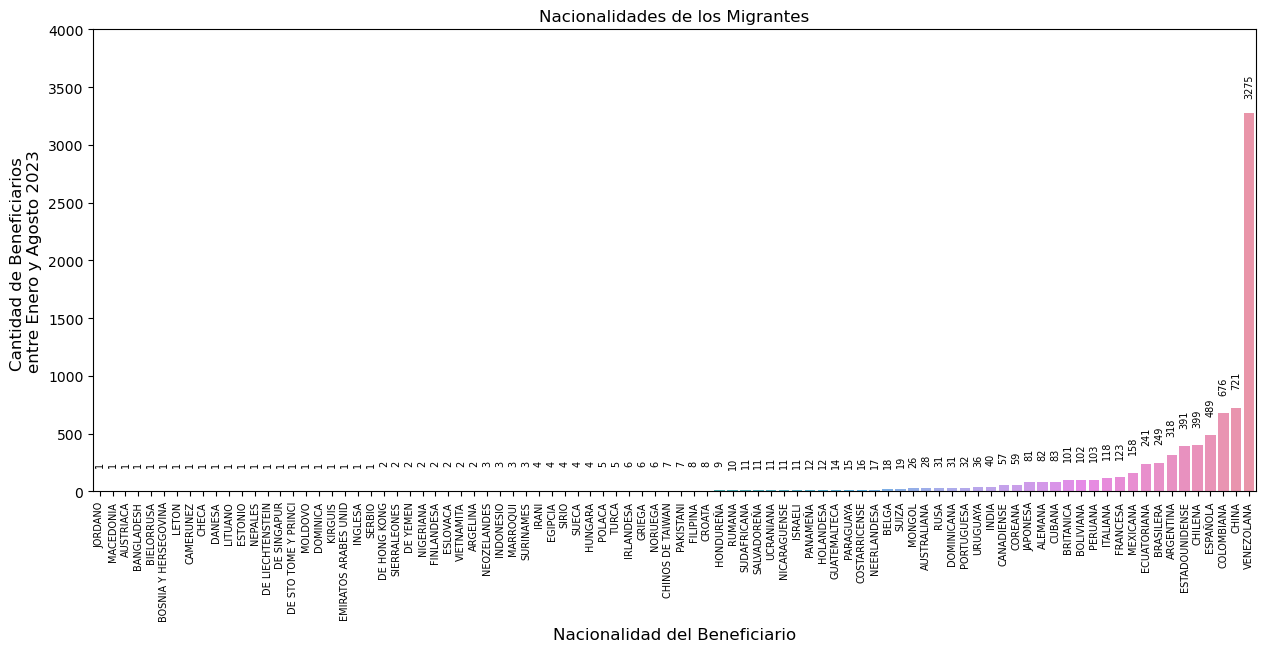

In [60]:
plt.figure(figsize=(15, 6))

g = sns.barplot(df_nacionalidades, x = 'NACIONALIDAD_BENEFICIARIO', y = 'CANTIDAD_BENEFICIARIOS')
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=7)
g.set_ylim(bottom=0, top=4000)
for p in g.patches:
    g.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=7, rotation = 90)

g.set_title("Nacionalidades de los Migrantes", fontsize = 12)
g.set_ylabel("Cantidad de Beneficiarios \nentre Enero y Agosto 2023", fontsize=12)
g.set_xlabel("Nacionalidad del Beneficiario", fontsize=12)
plt.show()

## Movimientos Migratorios por Nacionalidad

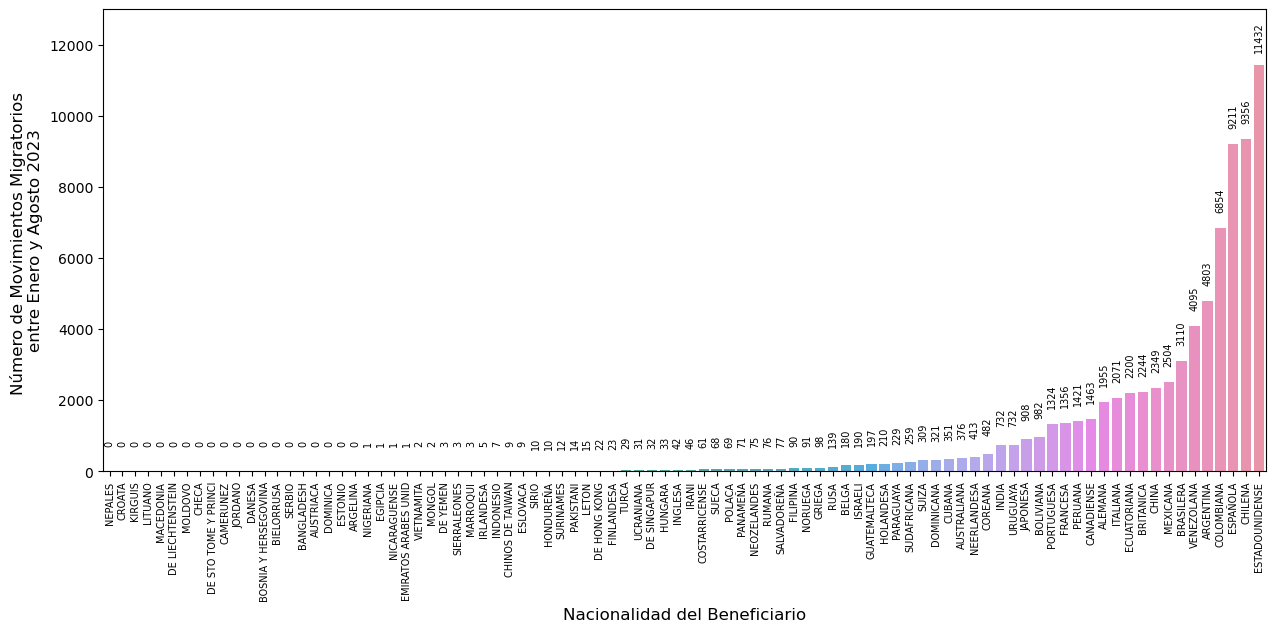

In [61]:
plt.figure(figsize=(15, 6))

g = sns.barplot(df_movimientos, x = 'NACIONALIDAD_BENEFICIARIO', y = 'TOTAL_MOV_MIGRA')
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=7)
g.set_ylim(bottom=0, top=13000)
for p in g.patches:
    g.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=7, rotation = 90)
    
g.set_ylabel("Número de Movimientos Migratorios \nentre Enero y Agosto 2023", fontsize=12)
g.set_xlabel("Nacionalidad del Beneficiario", fontsize=12)
plt.show()

## Periodos de Máxima Actividad

In [62]:
df_ene_oct['FECHA_DE_CORTE'] = pd.to_datetime(df_ene_oct['FECHA_DE_CORTE'])
df_ene_oct['MES'] = df_ene_oct['FECHA_DE_CORTE'].dt.month

df_trafico = df_ene_oct[['MES']].value_counts()
df_trafico = df_trafico.reset_index()
df_trafico.rename(columns = {0: 'MOVIMIENTOS_MIGRATORIOS'}, inplace = True)
df_trafico = df_trafico.sort_values(by = 'MES', ascending = True)
df_trafico = df_trafico.reset_index(drop = True)
print(df_trafico)

   MES  MOVIMIENTOS_MIGRATORIOS
0    1                     1499
1    2                      684
2    3                      796
3    4                      620
4    5                      811
5    6                      772
6    7                      809
7    8                      742
8    9                      794
9   10                      848


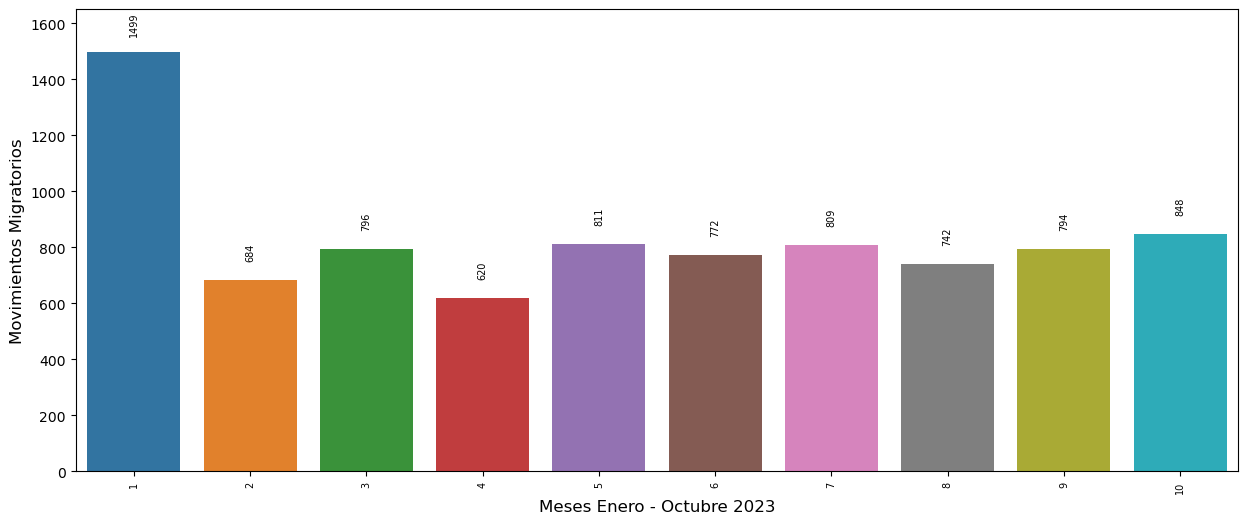

In [63]:
plt.figure(figsize=(15, 6))

g = sns.barplot(df_trafico, x = 'MES', y = 'MOVIMIENTOS_MIGRATORIOS')
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=7)
g.set_ylim(bottom=0, top=1650)
for p in g.patches:
    g.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=7, rotation = 90)

g.set_ylabel("Movimientos Migratorios", fontsize=12)
g.set_xlabel("Meses Enero - Octubre 2023", fontsize=12)

plt.show()

## Edades

In [64]:
df_edad = df_ene_oct['EDAD_BENEFICIARIO']
df_edad = df_edad.sort_values(ascending=True)
df_edad = df_edad.reset_index(drop = True)
print(df_edad)

0         3
1         5
2         6
3         6
4         7
       ... 
8370     98
8371     99
8372    102
8373    108
8374    110
Name: EDAD_BENEFICIARIO, Length: 8375, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16312\2297018449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=7)


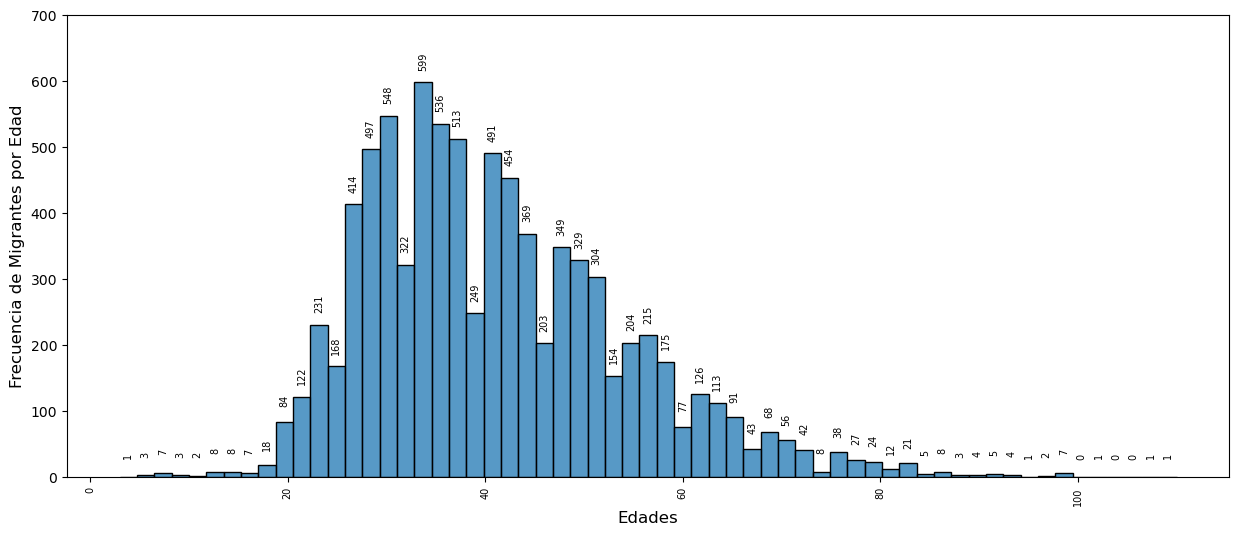

In [67]:
plt.figure(figsize=(15, 6))

g = sns.histplot(df_edad)

g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=7)
g.set_ylim(bottom=0, top=700)
for p in g.patches:
    g.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize = 7, rotation = 90)

g.set_ylabel("Frecuencia de Migrantes por Edad", fontsize=12)
g.set_xlabel("Edades", fontsize=12)

plt.show()